In [4]:
from optimizer.Ioptimizer import AbstractOptimizer
from optimizer.baseline import BaseOptimizer
from optimizer.suggested import SuggestedOptimizer


from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import shutil
 
# load seaborn and set theme to make the charts look better
import seaborn as sns
sns.set_theme()

# Main paper experiments

In [5]:
#Setup
checkpointDir = './prediction/checkpoints/'
estimationDir = './prediction/estimation/'

baselineLSTM_Model_test_TS = 'traininglog_0806_1.csvnext_timestamp'
baselineLSTM_Model_test_NA = 'traininglog_0806_1.csvnext_activity'

baselineLSTM_Model_real_TS = 'modi_BPI_2012_dropna_filter_act.csvnext_timestamp'
baselineLSTM_Model_real_NA = 'modi_BPI_2012_dropna_filter_act.csvnext_activity'

test_path_array=[
	"./sample_data/artificial/testlog_0806_1_40.csv"
	,"./sample_data/artificial/testlog_0806_1_60.csv"
	,"./sample_data/artificial/testlog_0806_1_80.csv"
	,"./sample_data/artificial/testlog_0806_1_100.csv"
	,"./sample_data/artificial/testlog_0806_1_120.csv"
	,"./sample_data/artificial/testlog_0806_1_140.csv"
	,"./sample_data/artificial/testlog_0806_1_160.csv"
	,"./sample_data/artificial/testlog_0806_1_180.csv"]

### Experiment 1

##### Baseline

In [6]:
#Experiment on an artificial event log - RQ1, RQ2 with baseline approach
res_info_path = "./sample_data/artificial/new_resource_0806_1.csv"

for test_path in test_path_array:
	BaseOptimizer().main(test_path=test_path
		, mode='test'
		, res_info_path=res_info_path
		, date='2012-03-01'
		, exp_name='pynb_exp1-baseline'
		, modelNextActivity = baselineLSTM_Model_test_NA
		, modelNextTimestamp = baselineLSTM_Model_test_TS
		, checkpointDir = checkpointDir
		, modelArchitecture = 'LSTM')

@timefn: assign_caseid took 0.0019979476928710938 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0 seconds
total weighted sum: 2175
suggested algorithm took 151.2 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0009999275207519531 seconds
total weighted sum: 3427
suggested algorithm took 201.5 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0 seconds
total weighted sum: 4665
suggested algorithm took 263.3 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0 seconds
Case2 exceed the limit
total weighted sum: 6348
suggested algorithm took 331.2 s
@timefn: assign_caseid took 0.0009996891021728516 seconds
@timefn: assign_activity took 0.0010097026824951172 seconds
@timefn: assign_resource took 0.0 seconds
total weighted sum: 6457
suggested algorithm took 387

##### Experiment

In [7]:
# Experiment on an artificial event log - RQ1, RQ2 with proposed method

# Threshold for the prediction accuracy
threshold=[0.3]

# Each file contains different number of instances for resource allocation
for alpha in threshold:
	for test_path in test_path_array:
		SuggestedOptimizer().main(test_path=test_path
			, mode='test'
			, alpha=alpha
			, beta=alpha
			, res_info_path=res_info_path
			, precision=0.0
			, date='2012-03-01'
			, exp_name='pynb-exp1'
			, modelNextActivity = baselineLSTM_Model_test_NA
			, modelNextTimestamp = baselineLSTM_Model_test_TS
			, checkpointDir = checkpointDir
			, estimationDir = estimationDir
			, modelArchitecture = 'LSTM')

@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0009989738464355469 seconds
total weighted sum: 2319
suggested algorithm took 595.3 s
total time for predictions: 580.5 s
total time for optimizations: 14.8 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0010006427764892578 seconds
@timefn: assign_resource took 0.0 seconds
Case49 exceed the limit
Case40 exceed the limit
total weighted sum: 3564
suggested algorithm took 885.4 s
total time for predictions: 870.6 s
total time for optimizations: 14.8 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0010008811950683594 seconds
@timefn: assign_resource took 0.0 seconds
Case2 exceed the limit
Case2 exceed the limit
Case55 exceed the limit
total weighted sum: 4488
suggested algorithm took 1182.7 s
total time for predictions: 1167.9 s
total time for optimizations: 14.9 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activ

##### Result

In [ ]:
def plotFiles(a, b, title):
    dfExp1Baseline = pd.read_csv(a, delimiter=';')
    dfExp1 = pd.read_csv(b, delimiter=';')

    # Filter possible double header entries
    dfExp1Baseline = dfExp1Baseline[dfExp1Baseline[dfExp1Baseline.columns[0]].str.contains(dfExp1Baseline.columns[0]) == False]
    dfExp1 = dfExp1[dfExp1[dfExp1.columns[0]].str.contains(dfExp1.columns[0]) == False]

    data = pd.merge(dfExp1Baseline,dfExp1,how="inner",on="Cases")

    # Ensure columns are numeric
    data["Total_weighted_sum_x"] = pd.to_numeric(data["Total_weighted_sum_x"])
    data["Total_weighted_sum_y"] = pd.to_numeric(data["Total_weighted_sum_y"])
    data["Total_computation_time_x"] = pd.to_numeric(data["Total_computation_time_x"])
    data["Total_computation_time_y"] = pd.to_numeric(data["Total_computation_time_y"])
    data["total_pred_time"] = pd.to_numeric(data["total_pred_time"])
    data["total_opti_time"] = pd.to_numeric(data["total_opti_time"])

    data["Weighted sum - Baseline"]      = data["Total_weighted_sum_y"]
    data["Weighted sum - Suggested"]     = data["Total_weighted_sum_x"]

    data["Total Computation time - Baseline"]  = data["Total_computation_time_y"]
    data["Total Computation time - Suggested"] = data["Total_computation_time_x"]
    data["Prediction time - Suggested"] = data["total_pred_time"]
    data["Optimization time - Suggested"] = data["total_opti_time"].abs()

    # Plot
    def plot(data, colX, colY, colorsY, markers, title, labelY, labelX="Cases"):
        plt.figure(figsize=(6,5), tight_layout=True)
        for y, c, (m, l) in zip(colY, colorsY, markers):
            plt.plot(colX, y, data=data,  marker=m, color=c, linestyle=l)
        plt.ylabel(labelY,fontsize=15)
        plt.xlabel(labelX,fontsize=15)
        plt.title(title,fontsize=20)
        plt.legend()
        plt.show()

    plot(data, "Cases"
        , ["Weighted sum - Baseline", "Weighted sum - Suggested"]
        , ["orange", "blue"]
        , [('o', '-'), ('x', '-')]
        , title + " - Total weighted sum"
        , "Total weighted sum")

    plot(data, "Cases"
        , ["Total Computation time - Baseline", "Total Computation time - Suggested", "Prediction time - Suggested", "Optimization time - Suggested"]
        , ["orange", "blue", "blue", "blue"]
        , [('o', '-'), ('x', '-'), ('^', '--'), ('D', '--')]
        , title + " - Total computation time"
        , "Total computation time")

    
    data['WeightedSumRatio'] = data["Weighted sum - Suggested"] / data["Weighted sum - Baseline"]
    data['RuntimeRatio'] = data["Total Computation time - Suggested"] / data["Total Computation time - Baseline"]
    ratioSet = data[['Cases', 'WeightedSumRatio', 'RuntimeRatio']].copy()
    print(ratioSet)

plotFiles("./exp_result/{}.txt".format('pynb-exp1'),"./exp_result/{}.txt".format('pynb_exp1-baseline'), "LSTM")

FileNotFoundError: File b'./exp_result/pynb-exp1.txt' does not exist

### Experiment 2

Seems like there is no baseline here

In [ ]:
#Experiment on an artificial event log - RQ3 with proposed method

# Threshold for the prediction accuracy
threshold=[0.2]

# Each file contains different number of instnaces for resource allocation
test_path_array=["./sample_data/artificial/testlog_0806_1_90.csv","./sample_data/artificial/testlog_0806_1_110.csv","./sample_data/artificial/testlog_0806_1_130.csv","./sample_data/artificial/testlog_0806_1_150.csv"]
precision_array=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for alpha in threshold:
	for test_path in test_path_array:
		for precision in precision_array:
			SuggestedOptimizer().main(test_path=test_path
			, mode='test'
			, alpha=alpha
			, beta=alpha
			, res_info_path=res_info_path
			, precision=precision
			, date='2012-03-01'
			, exp_name='pynb-exp2'
			, modelNextActivity = baselineLSTM_Model_test_NA
			, modelNextTimestamp = baselineLSTM_Model_test_TS
			, checkpointDir = checkpointDir
			, estimationDir = estimationDir
			, modelArchitecture = 'LSTM')

TypeError: main() missing 1 required positional argument: 'estimationDir'

### Experiment 3

##### Baseline

In [ ]:
# Experiment on an real-life event log - RQ1, RQ2 with baseline approach

# Each file contains instnaces released in each date for resource allocation
date_array=['2012-03-01','2012-03-02','2012-03-03','2012-03-04','2012-03-05','2012-03-06','2012-03-07','2012-03-08','2012-03-09','2012-03-10','2012-03-11','2012-03-12','2012-03-13','2012-03-14','2012-03-15']
testpath = "./sample_data/real/modi_BPI_2012_#date#.csv"
org_log_path = './sample_data/real/modi_BPI_2012_dropna_filter_act.csv'

for date in date_array:
	path = testpath.replace("#date#", date)
	BaseOptimizer().main(org_log_path=org_log_path
		, test_path=path
		, mode='real'
		, date=date
		, exp_name='pynb_exp_3-baseline'
		, modelNextActivity = baselineLSTM_Model_real_NA
		, modelNextTimestamp = baselineLSTM_Model_real_TS
		, checkpointDir = checkpointDir
		, modelArchitecture = 'LSTM')

@timefn: assign_caseid took 0.012495994567871094 seconds
@timefn: assign_activity took 0.008528470993041992 seconds
@timefn: assign_resource took 0.02500128746032715 seconds
%Y.%m.%d %H:%M:%S
@timefn: assign_timestamp took 0.02501082420349121 seconds
@timefn: assign_caseid took 0.0009806156158447266 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0009989738464355469 seconds
%Y.%m.%d %H:%M:%S
@timefn: assign_timestamp took 0.003001689910888672 seconds
9489 exceed the limit
8815 exceed the limit
9221 exceed the limit
9221 exceed the limit
8829 exceed the limit
9620 exceed the limit
9657 exceed the limit
total weighted sum: 5365
suggested algorithm took 406.1 s
@timefn: assign_caseid took 0.011009693145751953 seconds
@timefn: assign_activity took 0.006985187530517578 seconds
@timefn: assign_resource took 0.02299785614013672 seconds
%Y.%m.%d %H:%M:%S
@timefn: assign_timestamp took 0.01900315284729004 seconds
@timefn: assign_caseid took 0.001000642776489257

##### Experiment

In [ ]:
# Experiment on an real-life event log - RQ1, RQ2 with proposed method

# Threshold for the prediction accuracy
threshold=[1.0]

# Each file contains instnaces released in each date for resource allocation
date_array=['2012-03-01','2012-03-02','2012-03-03','2012-03-04','2012-03-05','2012-03-06','2012-03-07','2012-03-08','2012-03-09','2012-03-10','2012-03-11','2012-03-12','2012-03-13','2012-03-14','2012-03-15']
testpath = "./sample_data/real/modi_BPI_2012_#date#.csv"
org_log_path = './sample_data/real/modi_BPI_2012_dropna_filter_act.csv'

for alpha in threshold:
	for date in date_array:
		path = testpath.replace("#date#", date)
		SuggestedOptimizer().main(org_log_path=org_log_path
			, test_path=path
			, mode='real'
			, alpha=alpha
			, beta=alpha
			, date=date
			, precision=0.0
			, exp_name='pynb_exp_3'
			, modelNextActivity = baselineLSTM_Model_real_NA
			, modelNextTimestamp = baselineLSTM_Model_real_TS
			, checkpointDir = checkpointDir
			, estimationDir = estimationDir
			, modelArchitecture = 'LSTM')

@timefn: assign_caseid took 0.01101827621459961 seconds
@timefn: assign_activity took 0.00699162483215332 seconds
@timefn: assign_resource took 0.022999286651611328 seconds
%Y.%m.%d %H:%M:%S
@timefn: assign_timestamp took 0.02000594139099121 seconds
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0010046958923339844 seconds
%Y.%m.%d %H:%M:%S
@timefn: assign_timestamp took 0.0029892921447753906 seconds
8610 exceed the limit
8836 exceed the limit
7541 exceed the limit
9382 exceed the limit
9620 exceed the limit
9620 exceed the limit
8560 exceed the limit
9657 exceed the limit
9596 exceed the limit
9508 exceed the limit
9484 exceed the limit
9559 exceed the limit
9427 exceed the limit
total weighted sum: 4945
suggested algorithm took 17703.9 s
total time for predictions: 17682.7 s
total time for optimizations: 21.2 s
@timefn: assign_caseid took 0.011999130249023438 seconds
@timefn: assign_activity took 0.006997823715209961 

KeyboardInterrupt: 

##### Results

In [ ]:
#resultPath = './exp_result/'
#'pynb_exp_3.csv'

# Old paper - New model

First, train our new performer models in different configurations

In [ ]:
import shutil

# train - Performer Cfg. 1
%run ./prediction/train.py --data_dir ./sample_data/artificial/ --data_set traininglog_0806_1.csv --task next_timestamp --modelArch Performer1 --checkpoint_dir=./prediction/estimation/ --modelName Performer_1_Artificial
%run ./prediction/train.py --data_dir ./sample_data/artificial/ --data_set traininglog_0806_1.csv --task next_activity  --modelArch Performer1 --checkpoint_dir=./prediction/estimation/ --modelName Performer_1_Artificial
shutil.copy('./prediction/estimation/model_Performer_1_Artificialnext_activity_.h5', './prediction/checkpoints/') 
shutil.copy('./prediction/estimation/model_Performer_1_Artificialnext_timestamp_.h5', './prediction/checkpoints/') 

# train - Performer Cfg. 2
%run ./prediction/train.py --data_dir ./sample_data/artificial/ --data_set traininglog_0806_1.csv --task next_timestamp --modelArch Performer2 --checkpoint_dir=./prediction/estimation/ --modelName Performer_2_Artificial
%run ./prediction/train.py --data_dir ./sample_data/artificial/ --data_set traininglog_0806_1.csv --task next_activity  --modelArch Performer2 --checkpoint_dir=./prediction/estimation/ --modelName Performer_2_Artificial
shutil.copy('./prediction/estimation/model_Performer_2_Artificialnext_activity_.h5', './prediction/checkpoints/') 
shutil.copy('./prediction/estimation/model_Performer_2_Artificialnext_timestamp_.h5', './prediction/checkpoints/') 

act_char_to_int: {'Admission': 0, 'Blood Test': 1, 'Diagnosis': 2, 'Discharge': 3, 'Evaluation': 4, 'Intravenous': 5, 'MRI': 6, 'Registration': 7, 'Triage and Assessment': 8, 'Urine Test': 9, 'X-ray': 10, '!': 11}
act_int_to_char: {0: 'Admission', 1: 'Blood Test', 2: 'Diagnosis', 3: 'Discharge', 4: 'Evaluation', 5: 'Intravenous', 6: 'MRI', 7: 'Registration', 8: 'Triage and Assessment', 9: 'Urine Test', 10: 'X-ray', 11: '!'}
res_char_to_int: {'Resource1': 0, 'Resource10': 1, 'Resource11': 2, 'Resource12': 3, 'Resource13': 4, 'Resource14': 5, 'Resource15': 6, 'Resource16': 7, 'Resource17': 8, 'Resource18': 9, 'Resource19': 10, 'Resource2': 11, 'Resource20': 12, 'Resource21': 13, 'Resource22': 14, 'Resource23': 15, 'Resource24': 16, 'Resource25': 17, 'Resource3': 18, 'Resource4': 19, 'Resource5': 20, 'Resource6': 21, 'Resource7': 22, 'Resource8': 23, 'Resource9': 24}
res_int_to_char: {0: 'Resource1', 1: 'Resource10', 2: 'Resource11', 3: 'Resource12', 4: 'Resource13', 5: 'Resource14', 6: '

'./prediction/checkpoints/model_Performer_4_Artificialnext_timestamp_.h5'

In [ ]:
# Threshold for the prediction accuracy
threshold=[0.3]
res_info_path = "./sample_data/artificial/new_resource_0806_1.csv"

performerConfigs = [('Performer1', 'Performer_1_Artificial', 'exp_4'), ('Performer2', 'Performer_2_Artificial', 'exp_5')]

for performer, modelName, exp in performerConfigs:
	for path in test_path_array:
		BaseOptimizer().main(test_path=path, mode='test', res_info_path=res_info_path, date='2012-03-01', exp_name='pynb_' + exp + '-baseline'
				, modelNextActivity= modelName + "next_activity"
				, modelNextTimestamp=modelName + "next_timestamp"
				, checkpointDir='./prediction/checkpoints/'
				, estimationDir='./prediction/estimation/'
				, modelArchitecture=performer)

		for alpha in threshold:
			SuggestedOptimizer().main(test_path=path, mode='test', alpha=alpha, beta=alpha, res_info_path=res_info_path, date='2012-03-01', precision=0.0, exp_name='pynb_' + exp
				, modelNextActivity= modelName + "next_activity"
				, modelNextTimestamp=modelName + "next_timestamp"
				, checkpointDir='./prediction/checkpoints/'
				, estimationDir='./prediction/estimation/'
				, modelArchitecture=performer)

@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.0 seconds
total weighted sum: 2175
suggested algorithm took 105.1 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.00099945068359375 seconds
@timefn: assign_resource took 0.0 seconds
Case11 exceed the limit
Case2 exceed the limit
Case5 exceed the limit
total weighted sum: 2349
suggested algorithm took 444.8 s
total time for predictions: 428.5 s
total time for optimizations: 16.3 s
@timefn: assign_caseid took 0.0010001659393310547 seconds
@timefn: assign_activity took 0.0 seconds
@timefn: assign_resource took 0.001009225845336914 seconds
total weighted sum: 3427
suggested algorithm took 150.2 s
@timefn: assign_caseid took 0.0 seconds
@timefn: assign_activity took 0.00099945068359375 seconds
@timefn: assign_resource took 0.0 seconds
total weighted sum: 3690
suggested algorithm took 641.5 s
total time for predictions: 625.1 s
total time for optimizatio

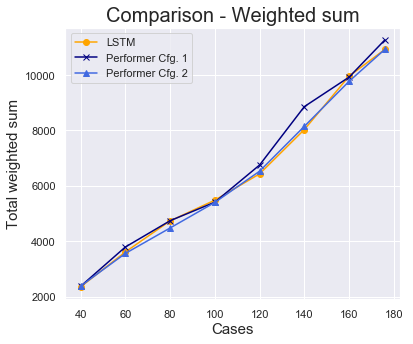

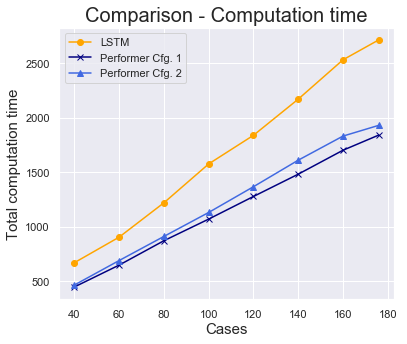

   Cases  Weight_Ratio_LSTM_is_1  Time_Ratio_LSTM_is_1
0     40                1.008944              0.667427
2     60                1.049307              0.716338
4     80                1.001480              0.714455
6    100                0.986681              0.678802
8    120                1.049611              0.694685
10   140                1.103113              0.682816
12   160                0.996485              0.672203
14   176                1.031396              0.678163
Weight ratio avg.: 1.028377220985007
Time ratio avg.: 0.6881110397135135


In [ ]:
def plotRuntimeComparisons(data, dataTitles, title):
    df = None
    i = 0
    for file in data:
        tmp = pd.read_csv(file, delimiter=';')
        tmp = tmp.drop(columns=['alpha', 'beta', 'precision', 'Avg_weight', 'Data'], errors='ignore')

        # Filter possible double header entries
        tmp = tmp[tmp[tmp.columns[0]].str.contains(tmp.columns[0]) == False]
        
        # Join into one big dataset
        if df is None:
            df = tmp
        else:
            df = pd.merge(df, tmp,how="inner",on="Cases")
        
        # Rename columns
        df.rename(columns={
            'Total_weighted_sum':       "Weighted sum - " + dataTitles[i], 
            'Total_computation_time':   "Total Computation time - " + dataTitles[i],
            'total_pred_time':          "Prediction time - " + dataTitles[i], 
            'total_opti_time':          "Optimization time - " + dataTitles[i]}, inplace=True)
        i += 1

    
    # Ensure columns are numeric and opti-time is abs
    for col in df.columns:
        df[col] = pd.to_numeric(df[col])        
        if col.startswith('Optimization time'):
            df[col] = df[col].abs()
    
    # Plot
    def plot(dataDF, colX, colY, colorsY, markers, title, labelY, labelX="Cases"):
        plt.figure(figsize=(6,5))#, tight_layout=True)
        for y, c, (m, l) in zip(colY, colorsY, markers):
            plt.plot(dataDF[colX], dataDF[y],  marker=m, color=c, linestyle=l, label=y.split(' - ')[1])
        plt.ylabel(labelY,fontsize=15)
        plt.xlabel(labelX,fontsize=15)
        plt.title(title,fontsize=20)
        plt.legend()
        plt.show()

    plot(df
        , "Cases"
        , ["Weighted sum - " + str(x) for x in dataTitles]
        , ["orange", "navy", "royalblue", "lightsteelblue"]
        , [('o', '-'), ('x', '-'), ('^', '-'), ('D', '-')]
        , title + " - Weighted sum"
        , "Total weighted sum")
    plot(df, "Cases"
        ,  ["Total Computation time - " + str(x) for x in dataTitles]
        #, ["Total Computation time - LSTM", "Prediction time - LSTM", "Optimization time - LSTM", "Total Computation time - Performer", "Prediction time - Performer", "Optimization time - Performer"]
        #, ["orange","orange","orange", "blue", "blue", "blue"]
        #, [('o', '-'), ('^', '--'), ('D', '--'), ('x', '-'), ('^', '--'), ('D', '--')]
        , ["orange", "navy", "royalblue", "lightsteelblue"]
        , [('o', '-'), ('x', '-'), ('^', '-'), ('D', '-')]
        , title + " - Computation time"
        , "Total computation time")



files = ["./exp_result/{}.txt".format('pynb-exp1'), "./exp_result/{}.txt".format('pynb_exp_4'), "./exp_result/{}.txt".format('pynb_exp_5')]
plotRuntimeComparisons(files, ["LSTM", "Performer Cfg. 1", "Performer Cfg. 2"], "Comparison")


dfLSTM = pd.read_csv(files[0], delimiter=';')
dfPerf50 = pd.read_csv(files[1], delimiter=';')
        
# Filter possible double header entries
dfLSTM = dfLSTM[dfLSTM[dfLSTM.columns[0]].str.contains(dfLSTM.columns[0]) == False]
dfPerf50 = dfPerf50[dfPerf50[dfPerf50.columns[0]].str.contains(dfLSTM.columns[0]) == False]

for df in [dfLSTM, dfPerf50]:
    for col in ['Total_weighted_sum', 'Total_computation_time']:
        df[col] = pd.to_numeric(df[col])  
dfLSTM['Weight_Ratio_LSTM_is_1'] = dfPerf50['Total_weighted_sum'] / dfLSTM['Total_weighted_sum'] 
dfLSTM['Time_Ratio_LSTM_is_1']   = dfPerf50['Total_computation_time'] / dfLSTM['Total_computation_time']
print(dfLSTM[['Cases', 'Weight_Ratio_LSTM_is_1', 'Time_Ratio_LSTM_is_1']])
print('Weight ratio avg.: ' + str(dfLSTM['Weight_Ratio_LSTM_is_1'].mean()))
print('Time ratio avg.: ' + str(dfLSTM['Time_Ratio_LSTM_is_1'].mean()))